# LENDING CLUB CASE STUDY


The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

We use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Creating the Pandas Dataframe

In [2]:
df = pd.read_csv('loan.csv',low_memory=False)
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Remove the empty columns

There are many columns with 0 non-null values. So, removing those columns

In [3]:
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Removing the rows with loan_status as "current"

Our interest is only on Fully Paid and Charged Off

In [4]:
df=df[df['loan_status']!='Current']
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### Removing columns that do not contribute to our analysis

-  id,member_id,emp_title, url, desc, title, zip_code

In [6]:

lists_to_be_removed =['next_pymnt_d','id','member_id','emp_title','issue_d','pymnt_plan','url','desc','title','zip_code','mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp','out_prncp_inv','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','total_rec_late_fee','recoveries','collection_recovery_fee','delinq_2yrs']


In [7]:
df=df.drop(lists_to_be_removed,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

### Finding and Fill missing values

In [8]:
#checking the number of null rows in each columns

len(df.index)-(len(df.index)-df.isna().sum())

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
dtype: int64

In [9]:
#checking the percentage of null rows in each columns

(df.isna().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
total_pymnt            0.000000
total_pymnt_inv        0.000000
total_rec_prncp        0.000000
total_rec_int          0.000000
dtype: float64

In [10]:
df.emp_length.describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [11]:
#dropping the null rows in revol_util column

df.dropna(axis = 0, subset = ['revol_util','emp_length'] , inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37497 non-null  int64  
 1   funded_amnt          37497 non-null  int64  
 2   funded_amnt_inv      37497 non-null  float64
 3   term                 37497 non-null  object 
 4   int_rate             37497 non-null  object 
 5   installment          37497 non-null  float64
 6   grade                37497 non-null  object 
 7   sub_grade            37497 non-null  object 
 8   emp_length           37497 non-null  object 
 9   home_ownership       37497 non-null  object 
 10  annual_inc           37497 non-null  float64
 11  verification_status  37497 non-null  object 
 12  loan_status          37497 non-null  object 
 13  purpose              37497 non-null  object 
 14  addr_state           37497 non-null  object 
 15  dti                  37497 non-null 

### Standradizing the values

-  'int_rate' column is converted to numerical column by removing the % symbol

-  In 'emp_length' the <1 year experience is changed to 0 and 10+ years changed to 10 and the string year is removed 

-  In column 'home_ownership' NONE category is merged with OTHER

-  In 'verification_status' column the verified and source verified category is considered as a single category i.e verified 

-  Column 'earliest_cr_line' date format is changed only to year

-  'revol_util' column is converted to numerical column by removing the % symbol



In [13]:
#converted to numerical column by removing the % symbol

df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'))

In [14]:
#<1 year experience is changed to 0 and 10+ years changed to 10 and the string year is removed 

df['emp_length']=df.emp_length.str.extract('(\d+)')

In [15]:
#'home_ownership' NONE category is merged with OTHER

df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [16]:
#the verified and source verified category is considered as a single category i.e verified 

df['verification_status']= df['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

In [17]:
#date format is changed only to year

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)


In [18]:
#converted to numerical column by removing the % symbol

df['revol_util'] = pd.to_numeric(df['revol_util'].str.rstrip('%'))

### Treatment of outliers

Annual income will have a great impact on loan status. So, checking for outliers.

<AxesSubplot:xlabel='annual_inc'>

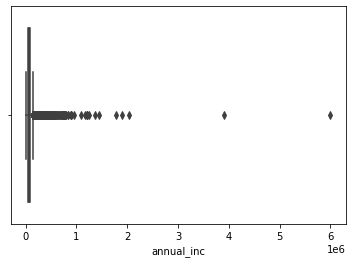

In [19]:
sns.boxplot(df['annual_inc'])

Above box plot indicates the presence of outliers. So, removing the outliers

In [20]:
print(df.annual_inc.quantile([0.5,0.75,0.9,0.95,0.96,0.98]))

0.50     60000.0
0.75     83000.0
0.90    116714.4
0.95    142000.0
0.96    150000.0
0.98    189996.0
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

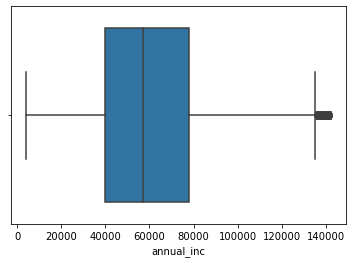

In [21]:
#income gap between 0.95 and 0.98 is very high. So values above 0.95 is considered outliers

df = df[df.annual_inc <= df['annual_inc'].quantile(0.95)]
sns.boxplot(df['annual_inc'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35630 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35630 non-null  int64  
 1   funded_amnt          35630 non-null  int64  
 2   funded_amnt_inv      35630 non-null  float64
 3   term                 35630 non-null  object 
 4   int_rate             35630 non-null  float64
 5   installment          35630 non-null  float64
 6   grade                35630 non-null  object 
 7   sub_grade            35630 non-null  object 
 8   emp_length           35630 non-null  object 
 9   home_ownership       35630 non-null  object 
 10  annual_inc           35630 non-null  float64
 11  verification_status  35630 non-null  object 
 12  loan_status          35630 non-null  object 
 13  purpose              35630 non-null  object 
 14  addr_state           35630 non-null  object 
 15  dti                  35630 non-null 

## Exploratory Data Analysis

-  Derived Metrics

-  Univariate Analysis

-  Bivariate Analysis

-  Multivariate Analysis

### Derived Metrics

#### Bucketing of numerical data

The numerical values that are necessary for the analysis are grouped into buckets

In [23]:
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=5,precision =0, labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df['int_rate_bins'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df['dti_bins'] = pd.cut(df['dti'],  bins = 5,precision =0, labels=['0-5', '05-10', '10-15', '15-20', '25+'])
df['open_acc_bins'] = pd.cut(df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df['revol_util_bins'] = pd.cut(df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df['total_acc_bins'] = pd.cut(df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

## Univariate Analysis

### Grade

<AxesSubplot:xlabel='grade', ylabel='count'>

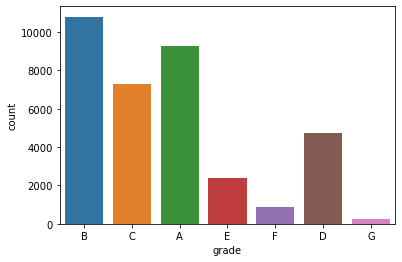

In [24]:
sns.countplot(x="grade",data=df)

#### Observation 

-  There are more number of people with loan grade A and less number of people with loan grade G

### Purpose

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

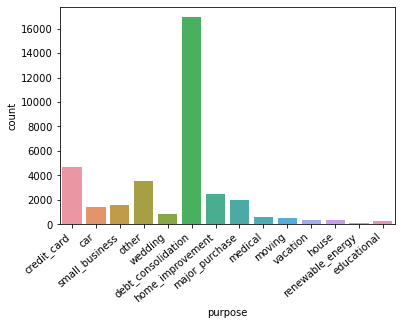

In [25]:
ax = sns.countplot(x="purpose", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### Observation 

- There are a large number of people who apply for loans for debt consolidation and only few people apply for loans for vacation, house, renewable energy and education

### Home_ownership

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

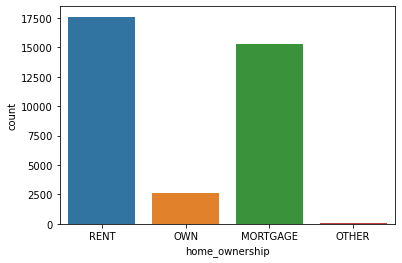

In [26]:
sns.countplot(x="home_ownership", data=df)

#### Observation 

-  People with rented or mortgaged houses are more likely to apply for a loan compared to people living in own houses

### Inquiries in last 6 months

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8')]

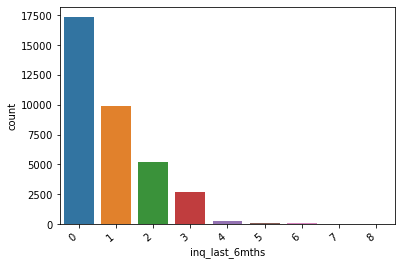

In [27]:
ax = sns.countplot(x="inq_last_6mths", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### Observation 

-  There are a large number of people with 0 inquiries and very less number of people with 4-8 inquiries

### Verification_status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

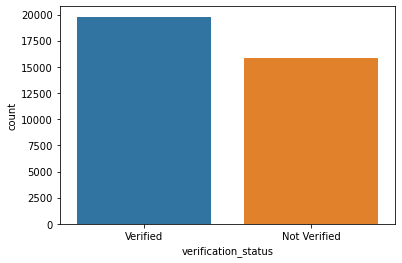

In [28]:
sns.countplot(x="verification_status", data=df)

#### Observation 

-  there are around 5000 more number of verified people than not-verified people

### Term

<AxesSubplot:xlabel='term', ylabel='count'>

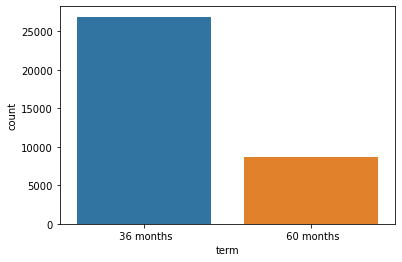

In [29]:
sns.countplot(x="term",data=df)

#### Observation 

-  There are more number of people under 36 month term

### loan_status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

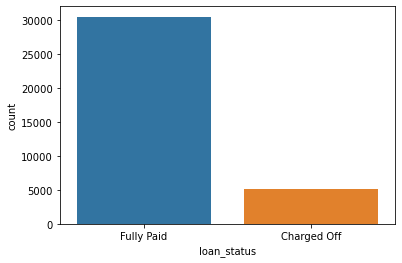

In [30]:
sns.countplot(x="loan_status",data=df)

#### Observation 

-  There are less number of people who are charged off

### pub_rec

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

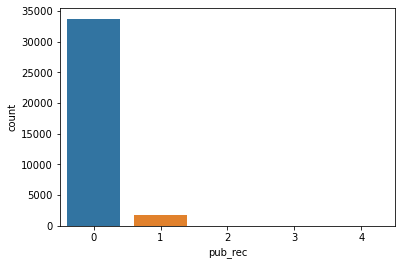

In [31]:
sns.countplot(x="pub_rec",data=df)

#### Observation 

-  There are more number of with 0 public records

### Int_rate

<AxesSubplot:xlabel='int_rate'>

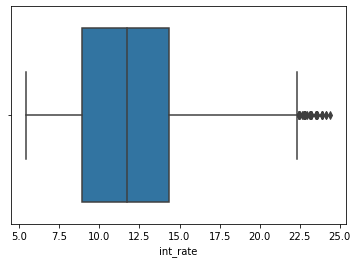

In [32]:
sns.boxplot(df['int_rate'])

#### Observation 

-  The interest rate is highly concentrated between 7.5 and 15.0

### DTI

<AxesSubplot:xlabel='dti'>

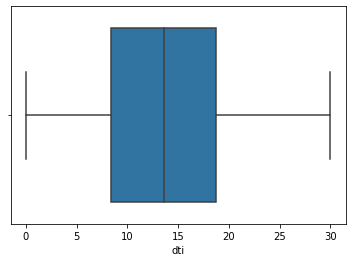

In [33]:
sns.boxplot(df['dti'])

#### Observation 

-  According to the information on the internet, a person with DTI below 43% is considered good to lend money to.
-  The above box plot shows distribution between 5 to 20

### Histogram for annual_inc

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

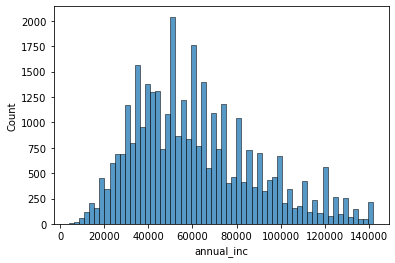

In [34]:
sns.histplot(x="annual_inc",data=df)

#### Observation 

-  There are more number of people with annual income between 30000 to 80000 

### Histogram for loan_amnt

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

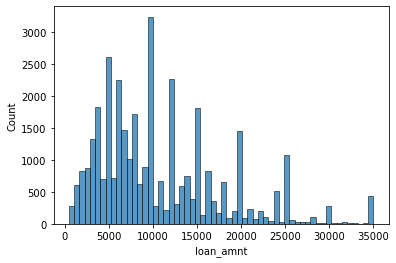

In [35]:
sns.histplot(x="loan_amnt",data=df)

#### Observation 

-  There is spike around rounded numbers

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

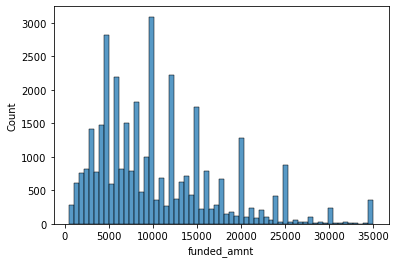

In [36]:
sns.histplot(x="funded_amnt",data=df)

#### Observation 

-  There is spike around rounded numbers

## Bivariate Analysis



In [37]:
#function for creating a barplot

def create_plot(column_name, label1 , label2, title, x = 9, y = 6, color_palette = 'mako'):
    df_name = df.groupby([column_name, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index() 
    df_name['chargedoff_prop'] = df_name['Charged Off'] / (df_name['Charged Off'] + df_name['Fully Paid'])
    
    plt.figure(figsize=(x,y))
    ax = sns.barplot(x=column_name,y='chargedoff_prop', data = df_name, palette = color_palette)
    ax.set_ylabel(label2,fontsize=15)
    ax.set_xlabel(label1,fontsize=15)
    plt.title(title,fontsize=16)
    plt.show()

### Charged off Vs Interest Range

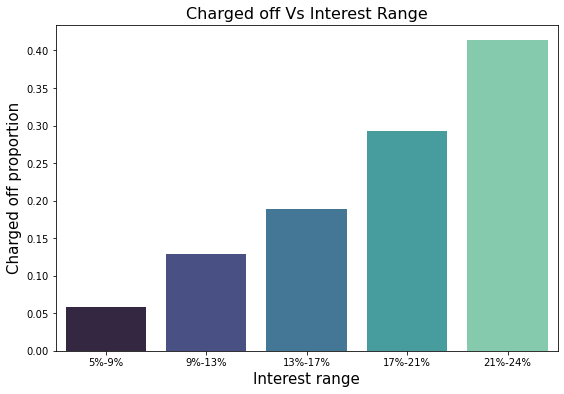

In [38]:
create_plot('int_rate_bins','Interest range','Charged off proportion','Charged off Vs Interest Range')

#### Observation 

-  With higher interest rate increases the risk of charge off

### Charged off Vs Loan Grade

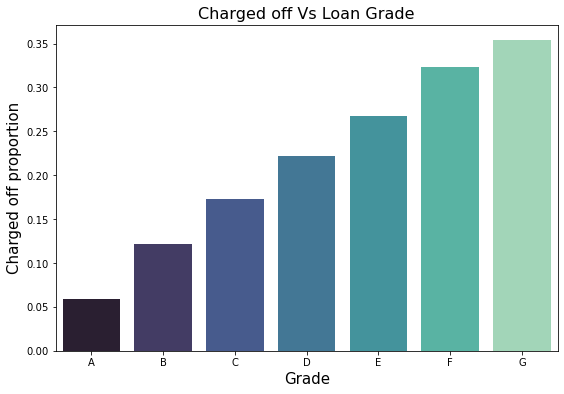

In [39]:
create_plot('grade','Grade','Charged off proportion','Charged off Vs Loan Grade')

#### Observation 

-  Charge of proportion increases with increases along A to G

### Annual Income vs Purpose

### Charged off Vs Term

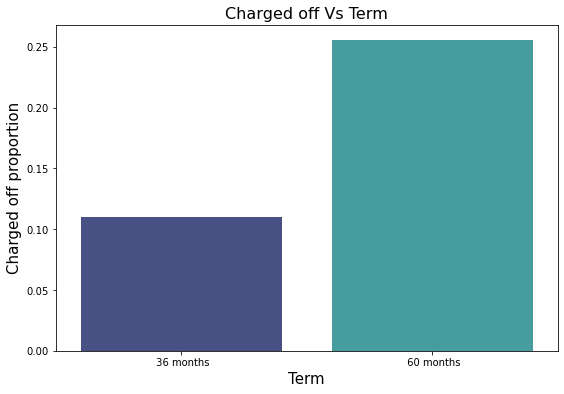

In [40]:

create_plot('term','Term','Charged off proportion','Charged off Vs Term')

### Observation

-  60 months term has higher charge off 

### Charged off Vs Purpose

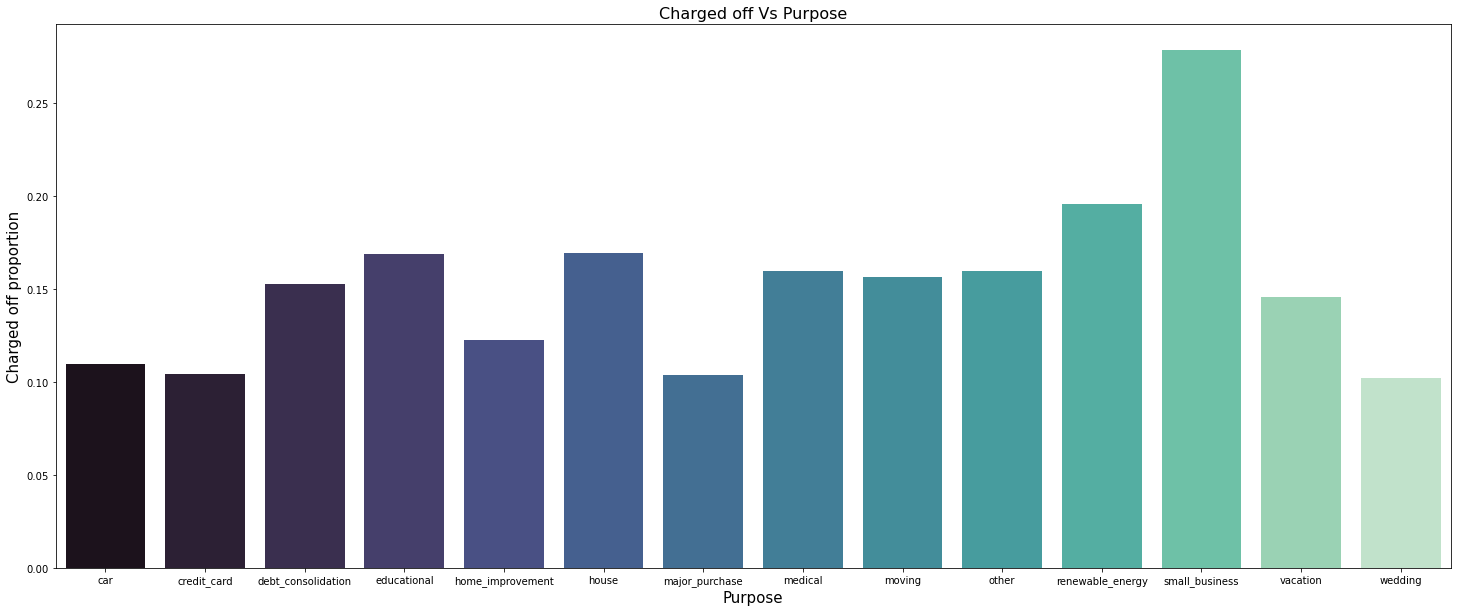

In [41]:

create_plot('purpose','Purpose','Charged off proportion','Charged off Vs Purpose',25,10)

### Observation

-  Charge off proportion is high for small bussiness loans

### Loan Amount Vs Home Ownership

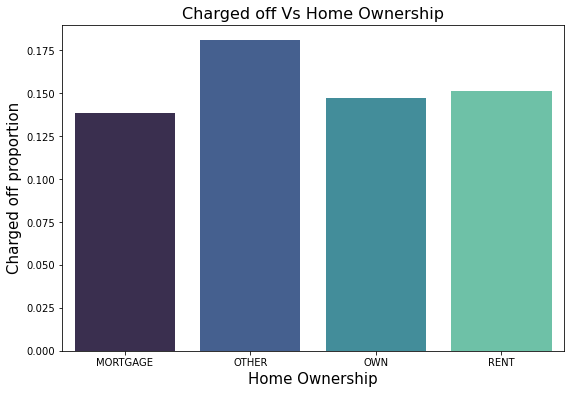

In [42]:
create_plot('home_ownership','Home Ownership','Charged off proportion','Charged off Vs Home Ownership')

### Observation

-  Charge off proportion is high when home ownership is not clear

### Loan amount Vs Sub Grade

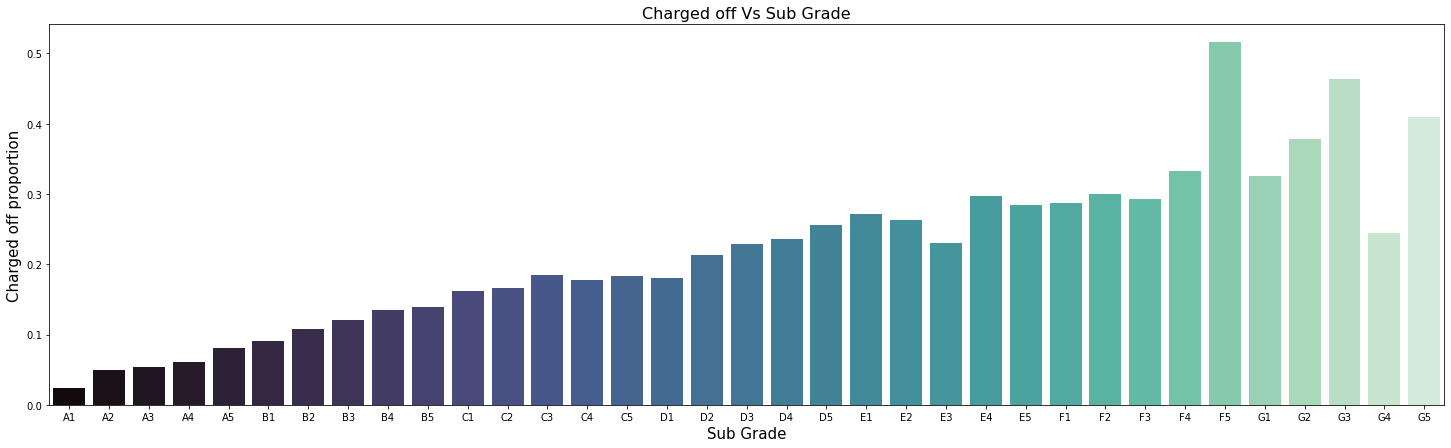

In [43]:
create_plot('sub_grade','Sub Grade','Charged off proportion','Charged off Vs Sub Grade',25,7)

### Observation

-  Charge off proportion increases along A to F

### Annual Income Group Vs Loan Amount

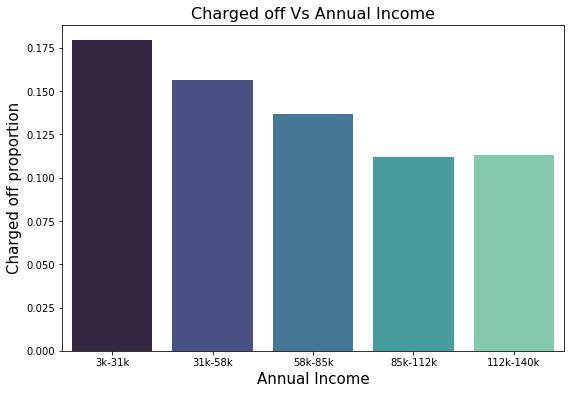

In [44]:
create_plot('annual_inc_bins','Annual Income','Charged off proportion','Charged off Vs Annual Income')

### Observation

-  Lower the annual income higher is the charge off proportion

### Loan Amount Vs Verification Status

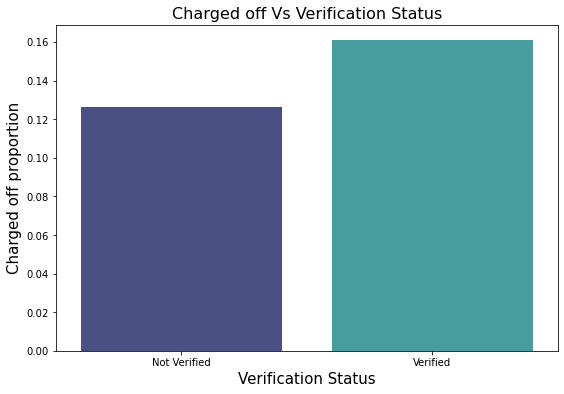

In [45]:
create_plot('verification_status','Verification Status','Charged off proportion','Charged off Vs Verification Status')

### Observation

-  Verification status does not give clear idea about charge off

### Charged off Vs Inquiry

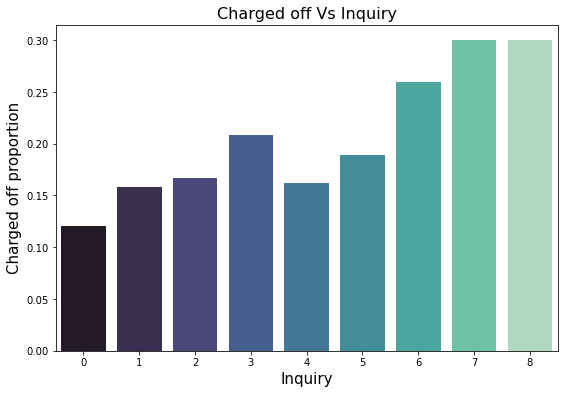

In [46]:
create_plot('inq_last_6mths','Inquiry','Charged off proportion','Charged off Vs Inquiry')

### Observation

-  Charge off increases with increase in number of inquiry

### Charged off Vs Open Accounts

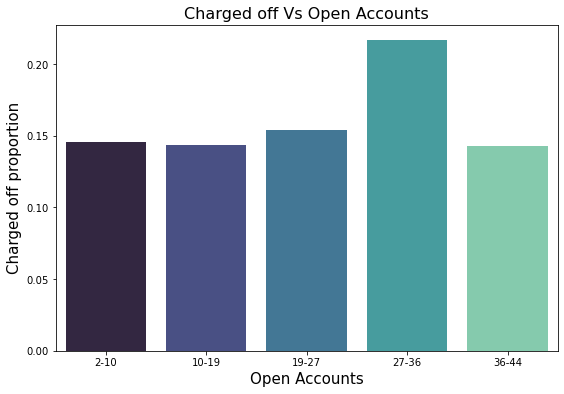

In [47]:
create_plot('open_acc_bins','Open Accounts','Charged off proportion','Charged off Vs Open Accounts')

### Observation

-  Charge off is high for people with 27-36 open accounts

### Charged off Vs Total Accounts

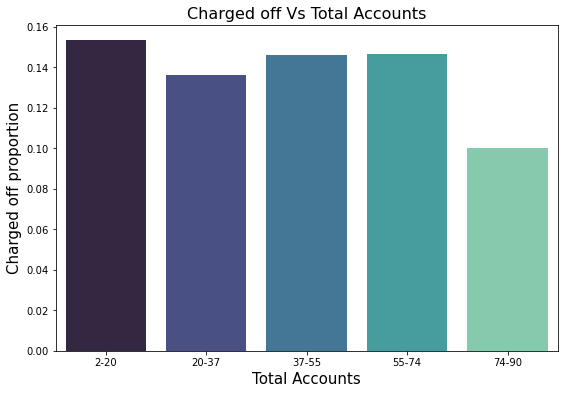

In [48]:
create_plot('total_acc_bins','Total Accounts','Charged off proportion','Charged off Vs Total Accounts')

### Observation

-  Lower total accounts has higher charge off proportion

### Multivariate Analysis

#### Correlation matrix with heat map

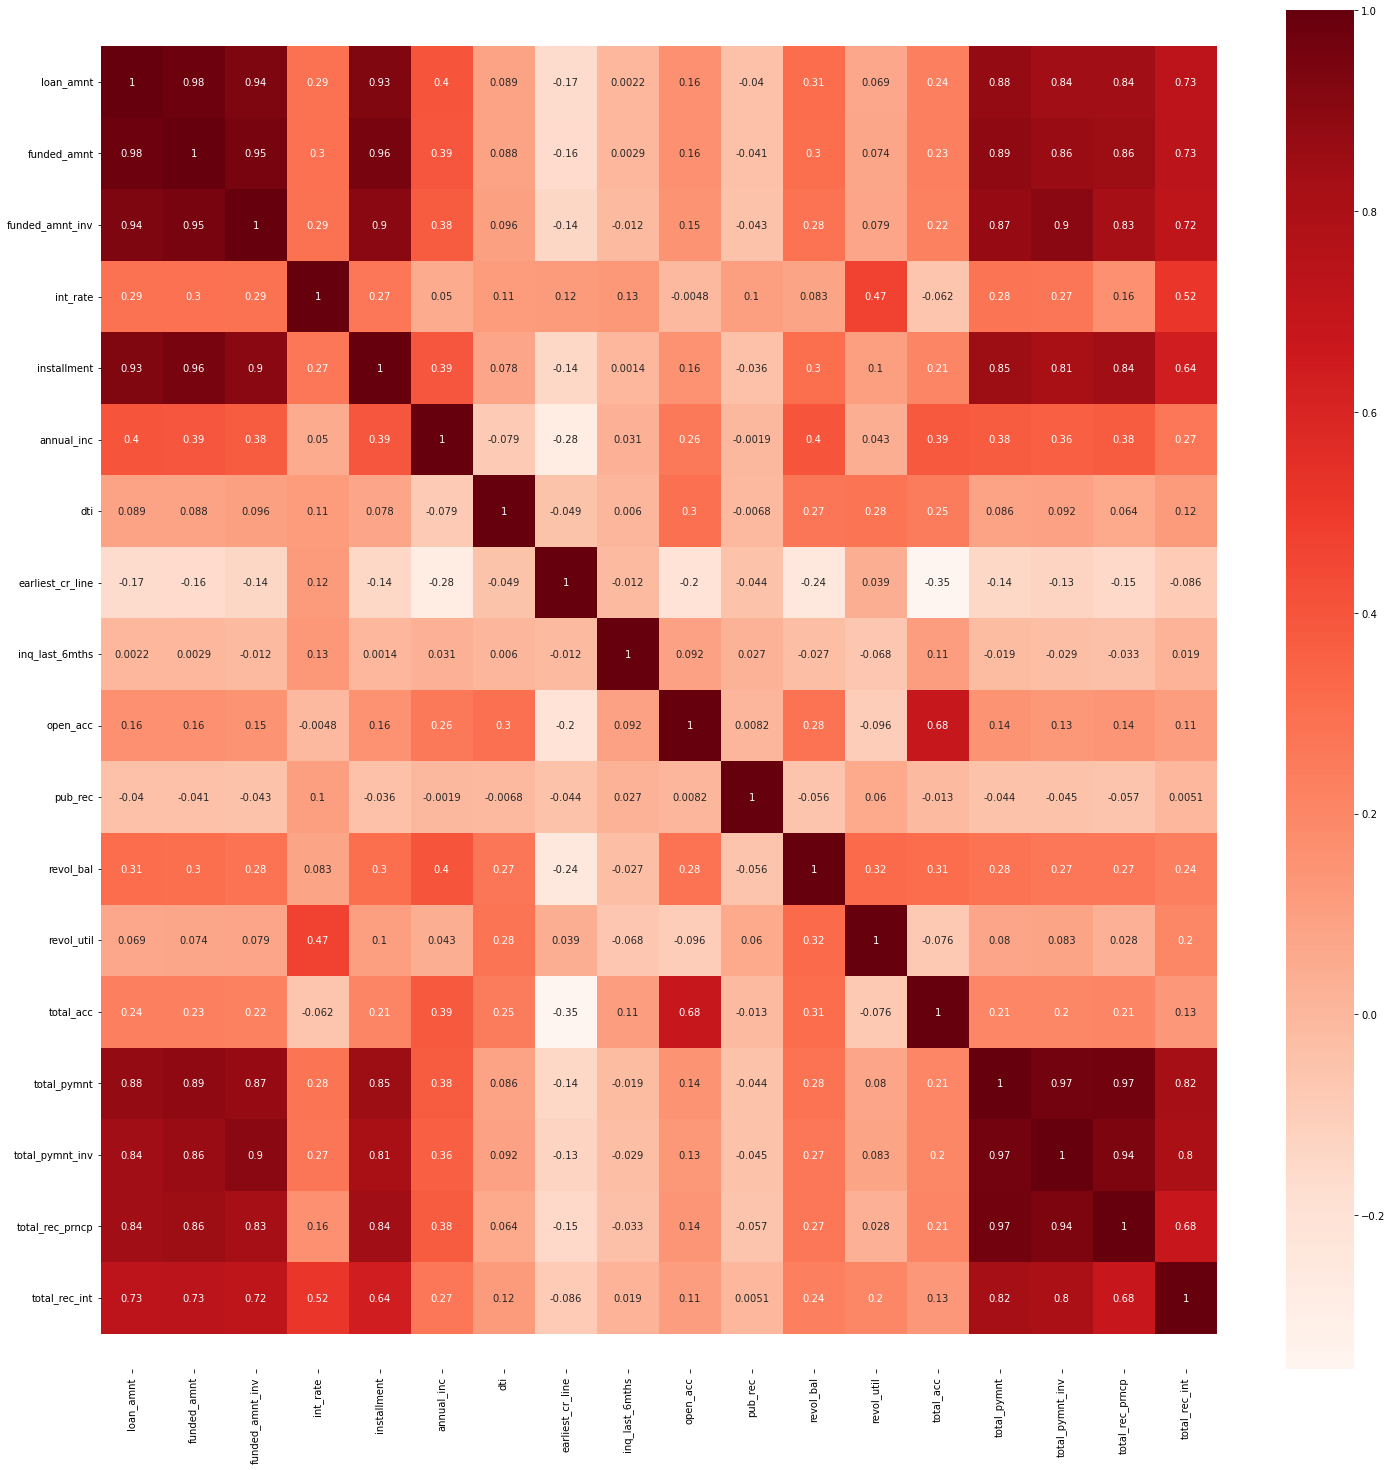

In [49]:
corr = df.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(corr, cmap="Reds", annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()